In [33]:
pip install pandas opencv-python

Note: you may need to restart the kernel to use updated packages.


Enter image number (1-3): 1


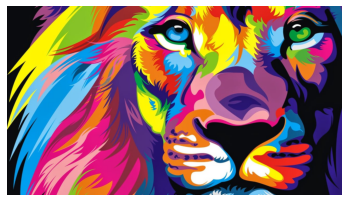

In [34]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


image_files = ['pic.jpg', 'pic2.jpg', 'pic3.jpg']


selection = int(input('Enter image number (1-3): '))


if selection >= 1 and selection <= 3:
   
    img = plt.imread(image_files[selection - 1])
    plt.axis("off")
    plt.imshow(img)
    plt.show()
else:
    print('Invalid selection.')


In [35]:
clicked = False 
r = g = b = x_pos = y_pos = 0

In [36]:
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv',names=index, header=None)
csv.head(10)

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
5,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54
6,alloy_orange,Alloy Orange,#c46210,196,98,16
7,almond,Almond,#efdecd,239,222,205
8,amaranth,Amaranth,#e52b50,229,43,80
9,amber,Amber,#ffbf00,255,191,0


In [37]:
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

In [38]:
def draw_function(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

In [39]:
import cv2
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)


In [40]:
while True:

    cv2.imshow("image", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    
    if clicked :

        cv2.rectangle(img, (20, 20), (750, 60), (b,g,r), -1)
        

        text = get_color_name(b, g, r) + ' R=' + str(b) + ' G=' + str(g) + ' B=' + str(r)

        
        cv2.putText(img, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
      
    
        if r + g + b >= 600:
            cv2.putText(img,text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
    
    
        clicked = False

    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()